# Compare Neanderthal datasets

This code explores Neanderthal-introgressed SNPs from 2 sources that employed different methods for identifiying Neanderthal-introgressed SNPs. The overlap in datasets is visualised using a venn diagram and the chromosomal distribution of the Neanderthal-introgressed SNPs is also plotted.

Neanderthal SNPs from:
1. Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. Genome Biol 2017 18:61.
2. Simonti CN et al. The phenotypic legacy of admixture between modern humans and Neandertals. Science 2016 351:737-41.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn2
from natsort import natsorted
sns.set()
%matplotlib inline

### Create dataframe of Neanderthal-introgressed SNPs from both sources

In [2]:
# Load Simonti dataset
simonti = pd.read_csv('simonti16_neanderthal_sites_hg19.bed', sep='\t')
simonti.drop(columns="1", inplace=True)
simonti.rename(columns={"#chrom": "Chromosome", "pos": "Position"}, inplace=True)
simonti['Chromosome'] = simonti['Chromosome'].map(lambda x: x.lstrip('chr')) # Remove "chr" string in column values
simonti['Chromosome'] = simonti['Chromosome'].astype('int64')

simonti.head()

,Chromosome,Position
0,1,834360
1,1,838695
2,1,850373
3,1,854793
4,1,1880284


In [3]:
# Load Dannemann dataset
dannemann = pd.read_csv('filter_aSNPs.txt', sep='_', header=None)
dannemann.rename(columns={0: "Chromosome", 1: "Position"}, inplace=True)

dannemann.head()

,Chromosome,Position
0,1,1991137
1,1,1993688
2,1,1993705
3,1,1993828
4,1,1993860


In [4]:
# Compare Dannemann vs Simonti datasets
comparison_df = simonti.merge(dannemann, indicator=True, how='outer')
comparison_df.rename(columns={"_merge": "Source"}, inplace=True)
comparison_df.replace({"left_only": "simonti_only", "right_only": "dannemann_only"}, inplace=True)
comparison_df['Source'] = comparison_df['Source'].astype('string')

comparison_df.head()
comparison_df.to_csv("comparison_df.csv")

,Chromosome,Position,Source
0,1,834360,simonti_only
1,1,838695,simonti_only
2,1,850373,simonti_only
3,1,854793,simonti_only
4,1,1880284,simonti_only


### Explore overlap in datasets

In [5]:
# Number of SNPs by source
comparison_df['Source'].value_counts()

dannemann_only    218286
both               90928
simonti_only       43936
Name: Source, dtype: Int64

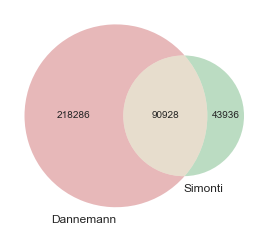

In [6]:
# Plot Venn diagram
dann = []
for chrom, pos in zip(dannemann['Chromosome'], dannemann['Position']):
    dann.append(str(chrom) + ' ' + str(pos))

simo = []
for chrom, pos in zip(simonti['Chromosome'], simonti['Position']):
    simo.append(str(chrom) + ' ' + str(pos))

venn2(subsets=(set(dann), set(simo)), set_labels=('Dannemann', 'Simonti'))

### Explore chromosomal distribution of Neanderthal-introgressed SNPs

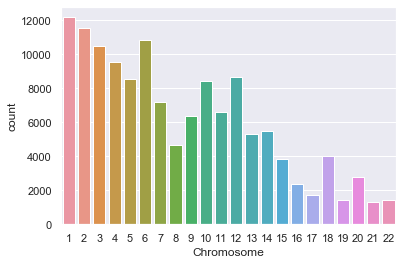

In [7]:
# Simonti dataset
sns.countplot(x='Chromosome', data=simonti)

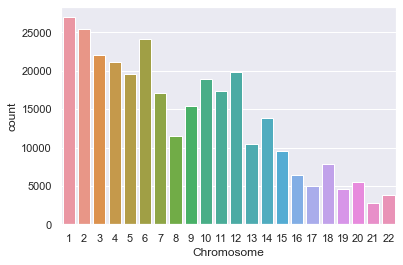

In [8]:
# Dannemann dataset
sns.countplot(x='Chromosome', data=dannemann)

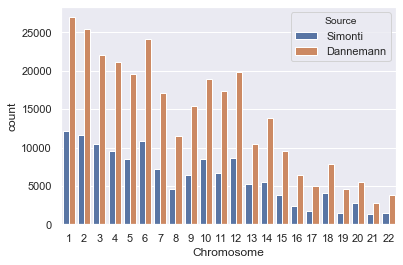

In [9]:
# Simonti vs Dannemann
simonti_copy = simonti
simonti_copy['Source'] = 'Simonti'
dannemann_copy = dannemann
dannemann_copy['Source'] = 'Dannemann'
concat_df = pd.concat([simonti_copy, dannemann_copy], keys=['Chromosome', 'Position', 'Source'])
x_labels = natsorted(pd.unique(concat_df['Chromosome']))
sns.countplot(x='Chromosome', data=concat_df, hue='Source', order=x_labels)

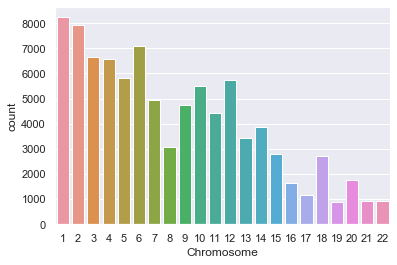

In [10]:
# Shared SNPs
shared_snps = comparison_df[comparison_df['Source'] == "both"]
x_labels = natsorted(pd.unique(shared_snps['Chromosome']))
sns.countplot(x='Chromosome', data=shared_snps, order=x_labels)